In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv('dt_analysis.csv')
df.head()

,tree,dataset,language,splitting_criterion,rows,columns,leaf_nodes,depth,accuracy,generation_time,prediction_time
0,d1,heart failure prediction,r,gini,299,13,4,4,80.41,0.011,0.004
1,d2,heart failure prediction,r,gain ratio,299,13,7,7,78.35,0.084,0.020
2,d3,heart failure prediction,r,gain ratio,299,13,6,5,80.41,0.014,0.008
3,d4,heart failure prediction,python,gini,299,13,28,9,67.01,0.007,0.002
4,d5,heart failure prediction,python,info gain,299,13,25,9,74.22,0.003,0.002


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0    tree                42 non-null     object 
 1   dataset              42 non-null     object 
 2   language             42 non-null     object 
 3   splitting_criterion  42 non-null     object 
 4   rows                 42 non-null     int64  
 5   columns              42 non-null     int64  
 6   leaf_nodes           42 non-null     int64  
 7   depth                42 non-null     int64  
 8   accuracy             42 non-null     float64
 9   generation_time      42 non-null     float64
 10  prediction_time      42 non-null     float64
dtypes: float64(3), int64(4), object(4)
memory usage: 3.7+ KB


<AxesSubplot:xlabel='language'>

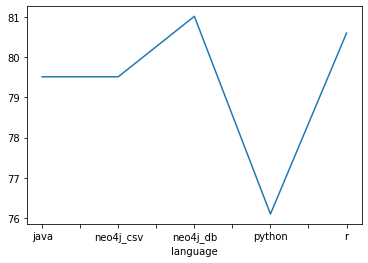

In [4]:
acc_df = df.groupby(['language']).mean()['accuracy']
acc_df.plot.line()

c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='language', ylabel='accuracy'>

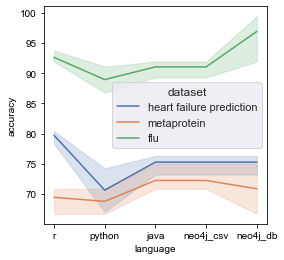

In [5]:
fig_dims = (4, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale=1)
sns.lineplot('language','accuracy',  data =df, hue='dataset', ax=ax)

c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='splitting_criterion', ylabel='accuracy'>

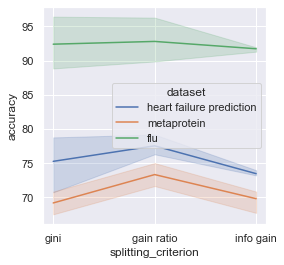

In [6]:
fig_dims = (4, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale=1)
sns.lineplot('splitting_criterion','accuracy',  data =df, hue='dataset', ax=ax)


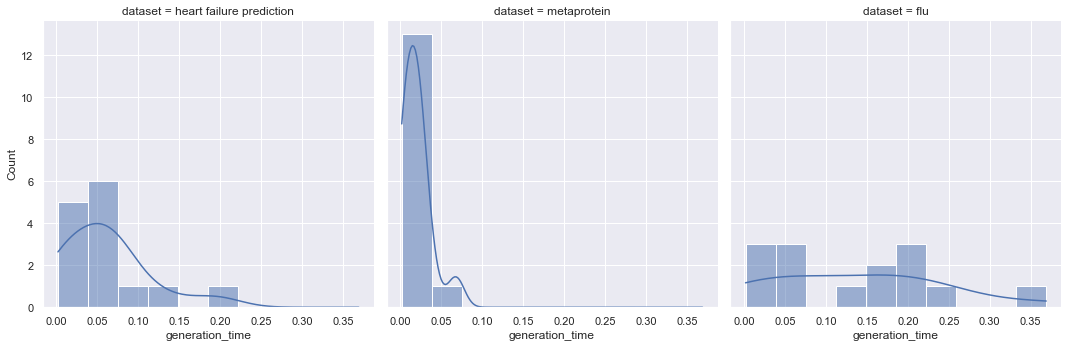

In [7]:
fig_dims = (8, 6)
sns.displot(data=df, x="generation_time",col= "dataset", kde=True)

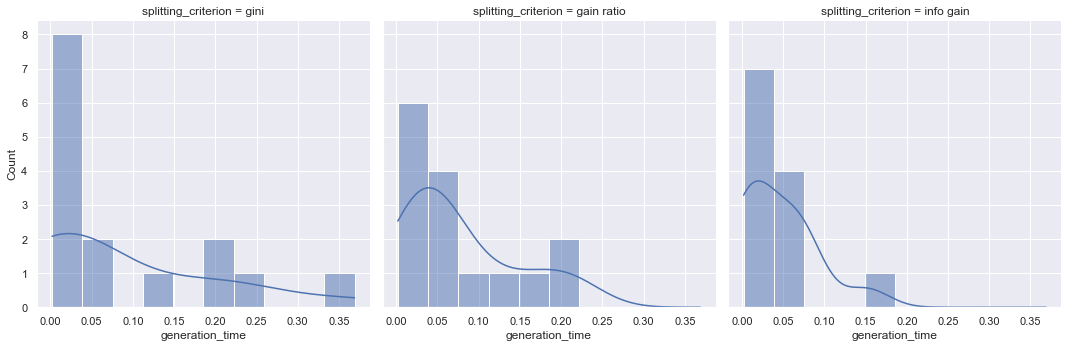

In [8]:
sns.displot(data=df, x="generation_time",col= "splitting_criterion", kde=True)

No handles with labels found to put in legend.
c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.
c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-9-92292808f673>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[Text(0.5, 0, '')]

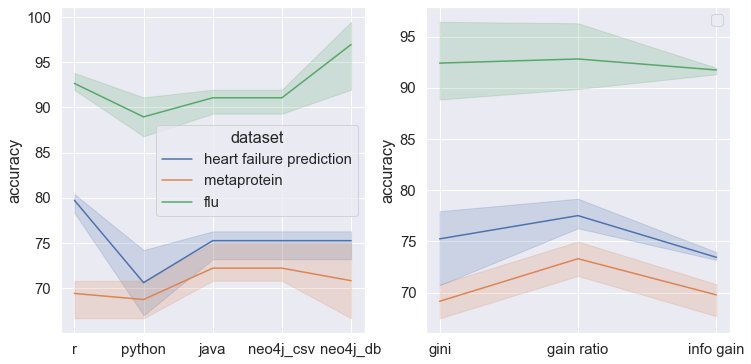

In [9]:
sns.set(font_scale=1.35)
fig_dims = (12, 6)
fig, ax =plt.subplots(1,2, figsize=fig_dims)
plt.legend(fontsize='x-large', title_fontsize='40')
#sns.countplot(df['batting'], ax=ax[0])
fig1=sns.lineplot('language','accuracy',  data =df, hue='dataset', ax=ax[0], legend=True)
plt.legend(loc='best')
#plt.setp(fig1.get_legend().get_texts(), fontsize='10') 

fig2 = sns.lineplot('splitting_criterion','accuracy',  data =df, hue='dataset', ax=ax[1], legend=False)
fig.show()
fig1.set(xlabel=None)
fig2.set(xlabel=None)

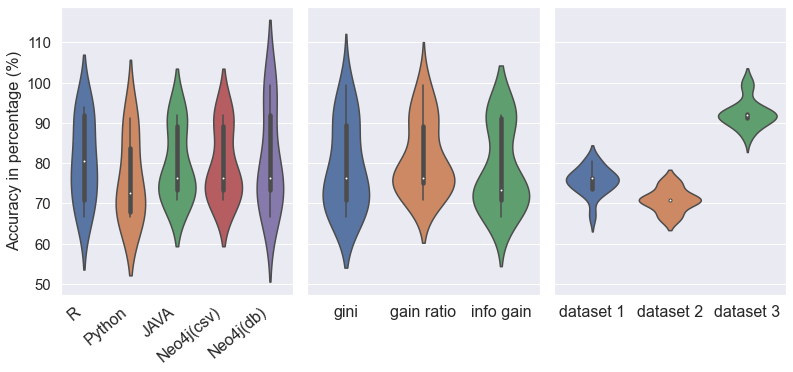

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5), sharey=True)

violin1 = sns.violinplot(ax = axes[0], data=df, kind="violin", x="language", y="accuracy")
violin2 = sns.violinplot(ax = axes[1], data=df, kind="violin", x="splitting_criterion", y="accuracy")
violin3 = sns.violinplot(ax = axes[2], data=df, kind="violin", x="dataset", y="accuracy")

violin1.set_xticklabels(['R','Python','JAVA', 'Neo4j(csv)', 'Neo4j(db)'])
violin3.set_xticklabels(['dataset 1','dataset 2','dataset 3'])

violin1.set(xlabel=None)
violin2.set(xlabel=None)
violin3.set(xlabel=None)
violin1.set(ylabel='Accuracy in percentage (%)')
violin2.set(ylabel=None)
violin3.set(ylabel=None)

violin1.set_xticklabels(violin1.get_xticklabels(), rotation=40, ha="right", size = 16)
violin2.set_xticklabels(violin2.get_xticklabels(), size = 16)
violin3.set_xticklabels(violin3.get_xticklabels(), size = 16)

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.06, 
                    hspace=0.2)

plt.show()

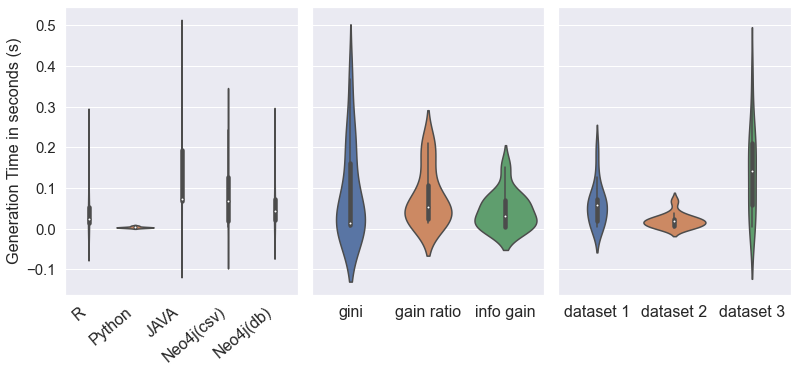

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5), sharey=True)

violin4 = sns.violinplot(ax = axes[0], data=df, kind="violin", x="language", y="generation_time")
violin5 = sns.violinplot(ax = axes[1], data=df, kind="violin", x="splitting_criterion", y="generation_time")
violin6 = sns.violinplot(ax = axes[2], data=df, kind="violin", x="dataset", y="generation_time")

violin4.set_xticklabels(['R','Python','JAVA', 'Neo4j(csv)', 'Neo4j(db)'])
violin6.set_xticklabels(['dataset 1','dataset 2','dataset 3'])

violin4.set(xlabel=None)
violin5.set(xlabel=None)
violin6.set(xlabel=None)
violin4.set(ylabel='Generation Time in seconds (s)')
violin5.set(ylabel=None)
violin6.set(ylabel=None)

violin4.set_xticklabels(violin4.get_xticklabels(), rotation=40, ha="right", size = 16)
violin5.set_xticklabels(violin5.get_xticklabels(), size = 16)
violin6.set_xticklabels(violin6.get_xticklabels(), size = 16)

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.06, 
                    hspace=0.2)
plt.show()

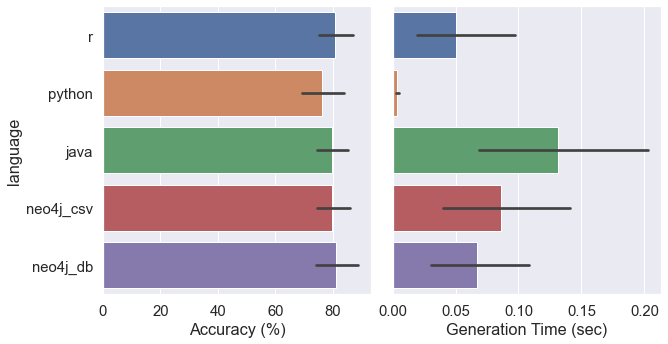

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

bar3= sns.barplot(ax = axes[0], data=df, x="accuracy", y="language")
bar4= sns.barplot(ax = axes[1],data=df, x="generation_time", y="language")

plt.draw()

bar3.set(xlabel = 'Accuracy (%)')
bar4.set(xlabel = 'Generation Time (sec)')
bar4.set(ylabel = None)

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.08, 
                    hspace=0.2)

In [13]:
neo_df = df[df['language']=='neo4j_csv']
neo_db_df = df[df['language']=='neo4j_db']
neo_df2 = neo_df.append(neo_db_df, ignore_index=True)
neo_df2
#sns.catplot(data=neo_df2, kind="violin", x="neo4j_csv", y="generation_time")

,tree,dataset,language,splitting_criterion,rows,columns,leaf_nodes,depth,accuracy,generation_time,prediction_time
0,d9,heart failure prediction,neo4j_csv,gini,299,13,12,10,76.29,0.128,0.001
1,d10,heart failure prediction,neo4j_csv,info gain,299,13,11,9,73.20,0.073,0.001
2,d11,heart failure prediction,neo4j_csv,gain ratio,299,13,8,8,76.29,0.057,0.001
3,d23,metaprotein,neo4j_csv,gini,48,50,5,4,70.83,0.012,0.000
4,d24,metaprotein,neo4j_csv,info gain,48,50,5,4,70.83,0.005,0.000
5,d25,metaprotein,neo4j_csv,gain ratio,48,50,5,4,75.00,0.019,0.000
6,d37,flu,neo4j_csv,gini,1485,13,15,6,91.93,0.243,0.002
7,d38,flu,neo4j_csv,info gain,1485,13,16,6,91.95,0.068,0.001
8,d39,flu,neo4j_csv,gain ratio,1485,13,15,9,89.30,0.167,0.001
9,d12,heart failure prediction,neo4j_db,gini,299,13,12,10,76.29,0.057,0.000


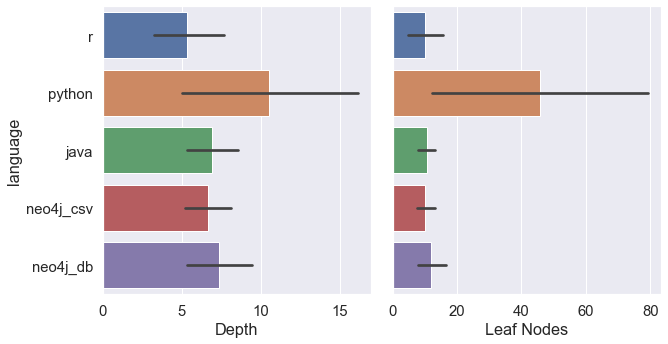

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

bar1= sns.barplot(ax = axes[0], data=df, x="depth", y="language")
bar2= sns.barplot(ax = axes[1],data=df, x="leaf_nodes", y="language")

plt.draw()
bar1.set(xlabel = 'Depth')
bar2.set(xlabel = 'Leaf Nodes')
bar2.set(ylabel = None)

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.08, 
                    hspace=0.2)

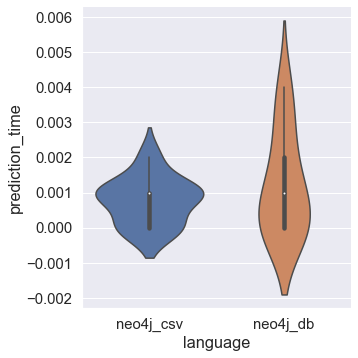

In [15]:
sns.catplot(data=neo_df2, kind="violin", x="language", y="prediction_time")

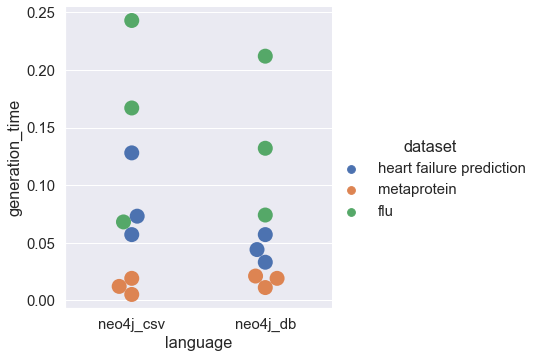

In [16]:
sns.catplot(data=neo_df2, kind="swarm", x="language", y="generation_time", hue="dataset", s = 15)

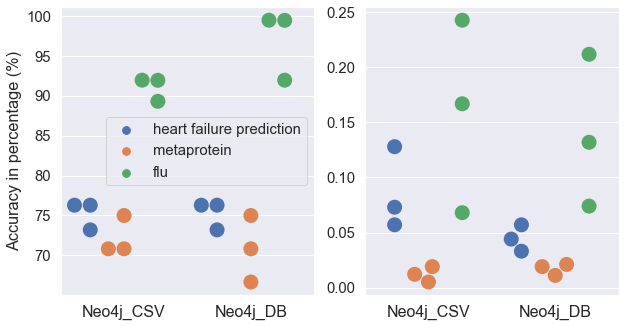

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

g = sns.swarmplot(data=neo_df2, x="language", y="accuracy", hue="dataset", ax = axes[0], s=15, dodge=True)

g.set_xticklabels(['Neo4j_CSV','Neo4j_DB'], size=16)
g.set(xlabel=None)
g.set(ylabel="Accuracy in percentage (%)")

g.legend().get_frame().set_linewidth(3.5)
handles, labels = g.get_legend_handles_labels()
g.legend(handles=handles[0:], labels=labels[0:])

h= sns.swarmplot(data=neo_df2, x="language", y="generation_time", hue="dataset",dodge=True, ax=axes[1], s=15)
legend = h.legend()
legend.remove()
h.set_xticklabels(['Neo4j_CSV','Neo4j_DB'], size=16)
h.set(xlabel=None)
h.set(ylabel=None)

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.2)

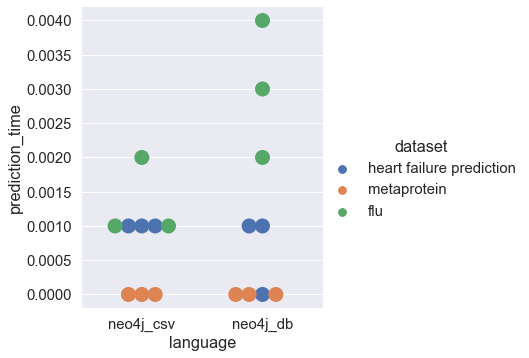

In [18]:
sns.catplot(data=neo_df2, kind="swarm", x="language", y="prediction_time", hue="dataset", s = 15)

In [19]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

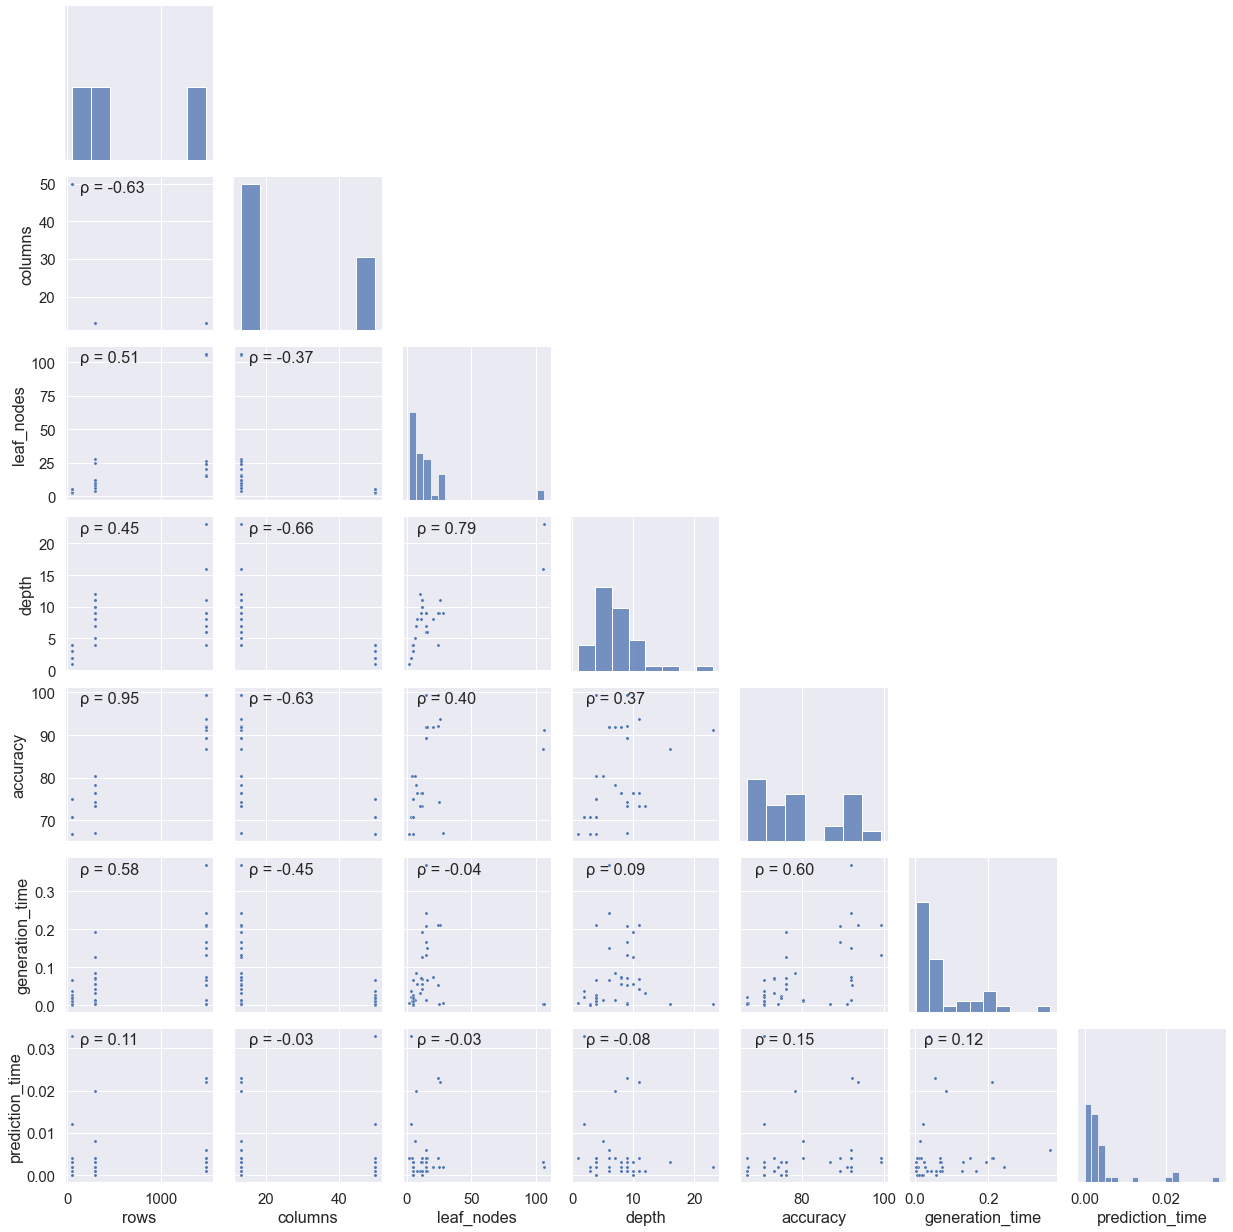

In [20]:
#sns.pairplot(data=df, hue="language", height=2.5)

g = sns.pairplot(df,corner=True,plot_kws={"s": 10})
g.map_lower(corrfunc)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


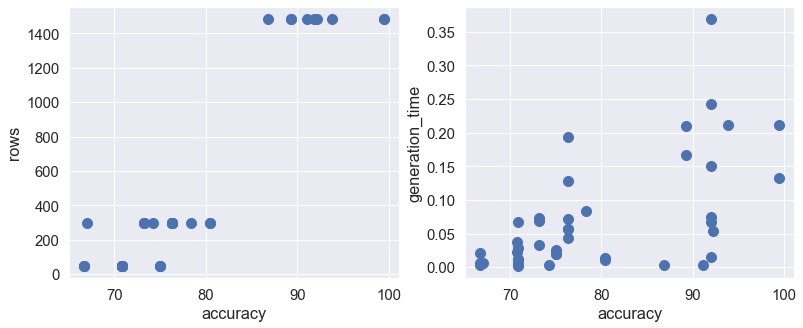

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

a = df.plot(kind='scatter', x='accuracy', y='rows', s=100, ax = axes[0])
b = df.plot(kind='scatter', x='accuracy', y='generation_time', s=100, ax=axes[1])